Este colab fue desarrollado por Arnold Charry Armero.

# Índices Estacionales

En la demanda de muchos productos existe estacionalidad; esto es, que dependiendo de la temporada por los eventos climáticos, culturales, sociales, políticos o económicos, hay una demanda mayor o menor. La estacionalidad puede aplicarse por horas, días, semanas, meses o otros patrones recurrentes (Heizer & Render, 2004). Un ejemplo clásico de estacionalidad serían los cuadernos, ya que su demanda crece en el período previo a entrada clases y disminuye cuando los estudiantes están en vacaciones. Para obtener los índices estacionales se desarrollan los siguientes pasos:

1. **Calcular la demanda histórica promedio estacional:** se suma la demanda de un mes particular en cada año y se divide entre el número de años.
2. **Calcular la demanda promedio de todas las estaciones:** se suman todas las demandas históricas promedio estacionales y esta cantidad se divide entre el número de estaciones.
3. **Calcular los índices estacionales:** se divide la demanda histórica promedio estacional por estación entre la demanda promedio de todas las estaciones. De esta manera, se obtienen los índices estacionales por estación.
4. **Estimar la demanda total para el siguiente año:** se estima con algún método cuál será la demanda para el próximo año.
5. **Calcular los pronósticos por estación:** se divide la demanda total para el siguiente año entre las estaciones y ese número se multiplica por cada índice estacional por estación.

Por lo general, para estimar la demanda total para el siguiente año, se utiliza el análisis de tendencia (regresión lineal), para las estimaciones de la demanda del siguiente año y a estas sí se les aplica los índices estacionales.




Ahora se continúa con la implementación en código.

In [ ]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [ ]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [ ]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


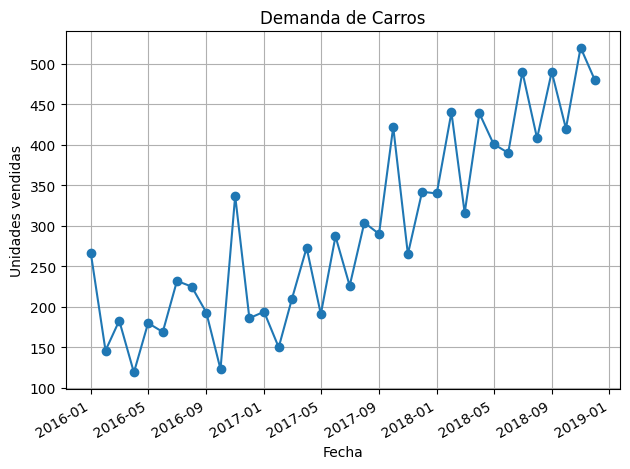

In [ ]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.grid()
plt.tight_layout()
plt.show()

## Pronósticos con Índices Estacionales

## Índices Estacionales

Utilizando funciones del módulo pandas, es posible obtener de manera resumida los datos que necesitamos. La función más importante es la de groupby, la cual permite almacenar y analizar datos por un patrón determinado.

In [ ]:
# Se realiza el primer paso, se calcula la demanda histórica promedio estacional
df_example = df.copy()
df_example['Month'] = df_example['Month'].dt.month
Average_Monthly = df_example.groupby('Month')['Sales'].mean()
df_seasonal = pd.DataFrame(data = Average_Monthly)
df_seasonal.head(12)

,Sales
Month,
1,266.666667
2,245.333333
3,236.333333
4,277.000000
5,257.333333
6,282.000000
7,316.000000
8,312.333333
9,324.333333


In [ ]:
#Renombramos la columna del seasonal dataframe
df_seasonal.rename(columns = {"Sales": "Annual Average Demand"}, inplace = True)
df_seasonal.head(12)

,Annual Average Demand
Month,
1,266.666667
2,245.333333
3,236.333333
4,277.000000
5,257.333333
6,282.000000
7,316.000000
8,312.333333
9,324.333333


In [ ]:
# Ahora se calcula la demanda promedio de todas las estaciones.

Sum = 0
for i in df_seasonal.iloc[:, 0]:
  Sum += i

monthly_average_demand = []

for i in range(len(df_seasonal.iloc[:, 0])):
  monthly_average_demand.append(Sum / 12)

df_seasonal.insert(loc = 1, column = "Monthly Average Demand", value = monthly_average_demand)
df_seasonal.head(12)

,Annual Average Demand,Monthly Average Demand
Month,,
1,266.666667,295.75
2,245.333333,295.75
3,236.333333,295.75
4,277.000000,295.75
5,257.333333,295.75
6,282.000000,295.75
7,316.000000,295.75
8,312.333333,295.75
9,324.333333,295.75


In [ ]:
#Ahora calculamos los índices estacionales
seasonal_indices = []

for i in range(len(df_seasonal.iloc[:, 0])):
  seasonal_indices.append(df_seasonal.iloc[i, 0] / df_seasonal.iloc[i, 1])

df_seasonal.insert(loc = 2, column = "Seasonal Indices", value = seasonal_indices)
df_seasonal.head(12)

,Annual Average Demand,Monthly Average Demand,Seasonal Indices
Month,,,
1,266.666667,295.75,0.901662
2,245.333333,295.75,0.829529
3,236.333333,295.75,0.799098
4,277.000000,295.75,0.936602
5,257.333333,295.75,0.870104
6,282.000000,295.75,0.953508
7,316.000000,295.75,1.068470
8,312.333333,295.75,1.056072
9,324.333333,295.75,1.096647


Como ejemplo, mencionemos que la demanda para el año 2019 sera de $6000$ carros en total. Para realizar el pronóstico se hace lo siguiente:

In [ ]:
# Se realizan los pronósticos para el año siguiente, el 2019
average_monthly_forecast_demand = 6000 / 12

seasonal_forecast = []

for i in range(len(df_seasonal.iloc[:, 0])):
  seasonal_forecast.append(df_seasonal.iloc[i, 2] * average_monthly_forecast_demand)

df_seasonal.insert(loc = 3, column = "Forecast 2019 (Intuitive)", value = seasonal_forecast)
df_seasonal.head(12)

,Annual Average Demand,Monthly Average Demand,Seasonal Indices,Forecast 2019 (Intuitive)
Month,,,,
1,266.666667,295.75,0.901662,450.831220
2,245.333333,295.75,0.829529,414.764722
3,236.333333,295.75,0.799098,399.549169
4,277.000000,295.75,0.936602,468.300930
5,257.333333,295.75,0.870104,435.052127
6,282.000000,295.75,0.953508,476.754015
7,316.000000,295.75,1.068470,534.234996
8,312.333333,295.75,1.056072,528.036066
9,324.333333,295.75,1.096647,548.323471


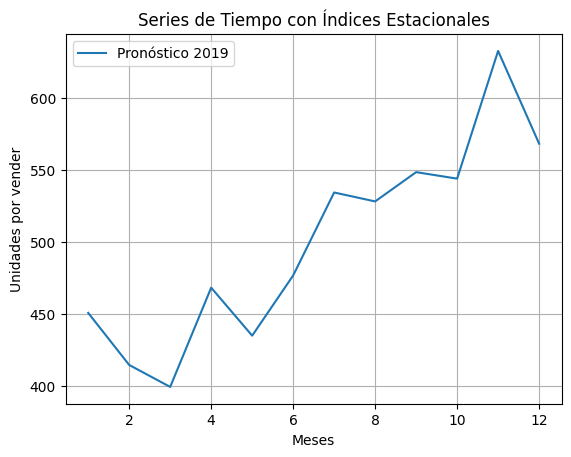

In [ ]:
# Se grafican los pronósticos.
plt.plot(df_seasonal.iloc[:, 3], label = 'Pronóstico 2019')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Índices Estacionales')
plt.xlabel("Meses")
plt.ylabel("Unidades por vender")
plt.show()

Ahora bien, un complemento perfecto para los índices estacionales viene siendo el análisis de tendencia (regresión lineal). Se va a implementar esta mezcla para dar pronósticos más exactos.

In [ ]:
# Se crea una instancia de tiempo pero sin fechas
Number_Months = []

for i in range(df.shape[0]):
  Number_Months.append(i + 1)

df.insert(loc = 1, column = "Número del Mes", value = Number_Months)
df

,Month,Número del Mes,Sales
0,2016-01-01,1,266.0
1,2016-02-01,2,146.0
2,2016-03-01,3,183.0
3,2016-04-01,4,119.0
4,2016-05-01,5,180.0
5,2016-06-01,6,169.0
6,2016-07-01,7,232.0
7,2016-08-01,8,225.0
8,2016-09-01,9,193.0
9,2016-10-01,10,123.0


In [ ]:
# Obteniendo b
def Obtener_Pendiente(x, y):
  n = df.shape[0] - 1
  xy = 0
  for i in range(n):
    xy += df.iloc[i, x] * df.iloc[i, y]

  x2 = 0
  for i in range(n):
    x2 += df.iloc[i, x] **2

  sumx = 0
  for i in range(n):
    sumx += df.iloc[i, x]

  averagex = sumx / n

  sumy = 0
  for i in range(n):
    sumy += df.iloc[i, y]

  averagey = sumy / n

  b = (xy - n * averagex * averagey) / (x2 - n * averagex ** 2)

  return b

In [ ]:
# Se obtiene la pendiente
b = Obtener_Pendiente(1, 2)
print(b)

9.711840411840411


In [ ]:
# Se obtiene la intersección con el eje y, el valor de a

def Obtener_Interseccion(b, x, y):
  n = df.shape[0] - 1
  sumx = 0
  for i in range(n):
    sumx += df.iloc[i, x]

  averagex = sumx / n

  sumy = 0
  for i in range(n):
    sumy += df.iloc[i, y]

  averagey = sumy / n

  a = averagey - b * averagex

  return a

In [ ]:
a = Obtener_Interseccion(b, 1, 2)
print(a)

116.0809523809524


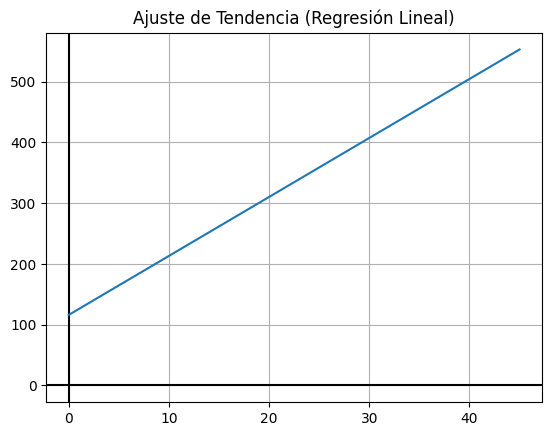

In [ ]:
def Linear_Regression(x):
  return a + b * x

x = np.linspace(0, 45)
y = [Linear_Regression(x) for x in x]
plt.grid()
plt.title("Ajuste de Tendencia (Regresión Lineal)")
plt.axvline(x=0, color='black', linestyle='-') #Eje y
plt.axhline(y=0, color='black') #Eje x
plt.plot(x, y)

In [ ]:
# Predecimos los resultados para el próximo año
New_year_forecast = []

for i in range(12):
  New_year_forecast.append(Linear_Regression(37 + i))

df_new_year = pd.DataFrame(data = New_year_forecast)
df_new_year

,0
0,475.419048
1,485.130888
2,494.842728
3,504.554569
4,514.266409
5,523.978250
6,533.690090
7,543.401931
8,553.113771
9,562.825611


### Índices Estacionales con Proyección de Tendencia

Para aplicar índices estacionales a una proyección de tendencia, se debe multiplicar cada valor de la proyección de tendencia por su respectivo índice estacional. Se expresa matemáticamente así:

$$ \hat{y}_{estacional} = \mathrm{indice} \times \hat{y}_{pronostico \: de \: tendencia} $$

Ahora, se utilizan los índices estacionales para realizar un pronóstico ajustado con tendencia:

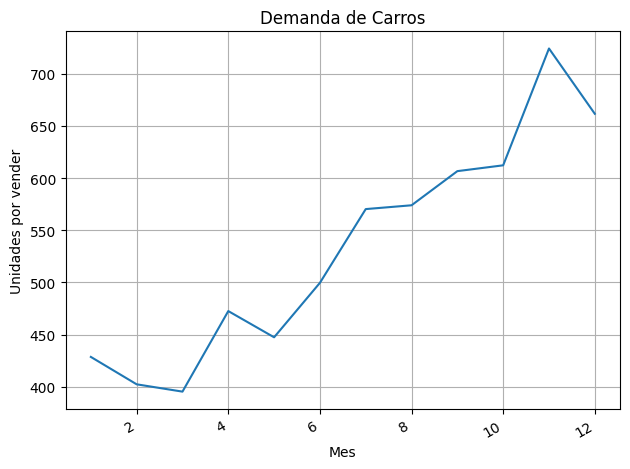

In [ ]:
Forecast_with_Trend = []

for i in range(len(df_seasonal.iloc[:, 2])):
  Forecast_with_Trend.append(df_seasonal.iloc[i, 2] * New_year_forecast[i])

Numbers = []

for i in range(12):
  Numbers.append(i + 1)

#Se realiza el gráfico de los datos
plt.plot(Numbers, Forecast_with_Trend, linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Mes")
plt.ylabel("Unidades por vender")
plt.tight_layout()
plt.grid()
plt.show()

#### Referencias

*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Poole, D. (2011). Algebra lineal. Una introduccion moderna. Cengage Learning Editores.

